# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.



### Шаг 1. Откройте файл с данными и изучитеобщую информацию. 

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


присваиваем содержимое таблицы переменной sales_archive ( архив продаж ), используем разделитель данных так как в исходном виде таблица не отображается корректно.

In [2]:
sales_archive = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

выводим первые 5 строчек таблицы для первичного ознакомления с данными.

In [3]:
display(sales_archive.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


даже по первым 5 строчка мы сразу видим пропуски в столбцах:
* ceiling_height
* living_area
* is_apartment
* kitchen_area
* balcony
* parks_nearest
* ponds_nearest
* days_exposition

**но необходимо подробнее изучить пропуски в таблице, возможно есть и другие столбцы с пропущенными значениями.**

посмотрим общуюю информацию о таблице с помощью info()

In [4]:
sales_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Здесь мы также можем видит пропуски, но их мы рассмотрим позднее.

У нескольких столбцов неверный тип данных:


Столбец | Текущий тип данных | Правильный тип данных | Причина 
------------ | ------------- | ------------- | -------------
first_day_exposition | object | datetime64 |  дата, а не число
floors_total | float64 | int64  | количество этажей целое число
is_apartment | object | bool  | булев массив известно из описания данных проекта
balcony  | float64 | int64  | количество балконов целое число
parks_around3000 | float64 | int64  | количество целое число ( не может быть 1,5 прака рядом)
ponds_around3000 | float64 | int64  | количество целое число 
days_exposition  | float64 | int64  | количество дней целое число.

поработаем над их исправлением чуть позже :) 

посмотрим характерные значения таблицы с помощью describe()

In [5]:
sales_archive.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сложно сделать вывод по текущим данным. 
Большое значение в std(стандартное отклонение) не обязательно ошибка, Мы рассматриваем рынок недвижомости, квартиры в центре могут стоит дороже, чем на окрайне в разы, поэтому такой разброс может быть правдив.  

**Но смущуют минимальные и максимальные значения во многих столбцах например несколько из них из них:**
* Жилая площадь в 2 квадратных метра ? выглядит очень подозрительно, если это конечно не каморка под лестницей Гарри Поттера.
* Высота потолков 100 метров, явно ошибка.
* Или потолок 1.25 метра, меньше квартиры хоббита... тоже не похоже на правду

**Вообщем необходимо дополнительно изучить крайние значения, на данный момент они очень похоже на ошибки ввода и мусор мешающий нам **

### Вывод

#### Данные неидеальны, нам необходимо хорошенько поработать над ними, а именно:
* **Изменить формат данных в столбцах:**
    * first_day_exposition	
    * floors_total
    * is_apartment	
    * balcony	
    * parks_nearest
    * ponds_around3000
    * days_exposition
* **Поработать над пропусками:**
    * ceiling_height
    * living_area
    * is_apartment
    * kitchen_area
    * balcony
    * parks_nearest
    * ponds_nearest
    * days_exposition
    * **возможно найдутся и другие**
* **Проверить дубликаты**

_**и обратить внимание на выбросы, которые удалось обнаружить сейчас при дальнейшем исследовании.**_


### Шаг 2. Предобработка данных

### Шаг 2.1 Определите и изучите пропущенные значения

С помощью isnull и sum посмотрим общее количество пропусков в dataframe с разбивкой по столбцам.

In [6]:
sales_archive.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Рассмотрим пропуски по порядку. Сначала столбец **ceiling_height** 

In [7]:
print('Количество пропусков:', len(sales_archive[sales_archive['ceiling_height'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['ceiling_height'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['ceiling_height'].isnull()].head(10))


Количество пропусков: 9195
Процент пропусков от всех значений столбца: 38.8%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,...,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


38% слишком большой процент пропусков, чтобы ими принебречь. Запросить уточнение по исходным данным мы не можем, поэтому попробуем заполнить их найдя зависимость от других столбцов

С помощью **fillna** заполним все пропуски нетипичный значеним '-1', чтобы в дальнейшем нам было проще исключил их из расчёта.

In [8]:
sales_archive["ceiling_height"].fillna(-1, inplace=True)

Могу предположить, что большинство квартир имеют типовую планировку и квартиры с одинаковой общей площадью идентичны.

Исключим значение -1 с помощью **query**, сгруппируем квартиры по общей плозащи с помощью **groupby** и найдём медану для полученных данных, далее создаём словарь.

*используем медиану так как у нас есть нетипичные значени в столбце, которые портят среднее. Как мы выяснили ранее, есть высота потолка в 100 метров, это сильное повляет на среднее значение*

In [9]:
name_to_height = sales_archive.query('ceiling_height>0').groupby('total_area')['ceiling_height'].median().to_dict()

Пишем функцию, которая для всех значений -1 в столбце ceiling_height будет присваивать медианное значение из словаря.

In [10]:
def med_ceiling_height(row):
    if row["ceiling_height"] == -1:
        if row['total_area'] in name_to_height:
            return name_to_height[row['total_area']]
    return row["ceiling_height"]

Применяем функцию с помощью **apply**

In [11]:
sales_archive['ceiling_height'] = sales_archive.apply(med_ceiling_height, axis=1)

Проверяем результат.

In [12]:
sales_archive.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

все пропуски заполнены, но мы ранее заменили все значени на -1, проверим остались ли они.

In [13]:
sales_archive.query('ceiling_height == -1')['ceiling_height'].count()

627

-1 остались, причина в том, что не все квартиры оказались типовыми, нам не удалось собрать в словарь медиану высоты потолков для них.

Посчитаем медиану целиком по столбцу, исключим из неё значение -1.

In [14]:
meadian_ceiling_height = sales_archive.query('ceiling_height > 0')['ceiling_height'].median()

Напишем функцию заменящую -1 на медиану.

In [15]:
def med_ceiling_height(row):
    if row["ceiling_height"] == -1:
        return meadian_ceiling_height
    return row["ceiling_height"]

Применяем функцию.

In [16]:
sales_archive['ceiling_height'] = sales_archive.apply(med_ceiling_height, axis=1)

Проверим остались ли теперь -1 в этом столбце

In [17]:
sales_archive.query('ceiling_height == -1')['ceiling_height'].count()

0

Их нет.
Теперь пропуски в этом столбце полностью заполнены корретными данными.

### Теперь рассмотрим пропуски в столбце **floors_total**

In [18]:
print('Количество пропусков:', len(sales_archive[sales_archive['floors_total'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['floors_total'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['floors_total'].isnull()].head())

Количество пропусков: 86
Процент пропусков от всех значений столбца: 0.4%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.775,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.550,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.770,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.800,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.650,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Всего 0.4 % пропусков в этом столбце. Я считаю, что таким количеством данных можно принебречь. 
Поэтому удаляем их с помощью метода **dropna**

In [19]:
sales_archive.dropna(subset =['floors_total'], inplace=True)

Проверяем пропуски

In [20]:
sales_archive.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Удаление прошло успешно, теперь в этом столбце нет пропусков.

### Пропуски в столбце **living_area**

In [21]:
print('Количество пропусков:', len(sales_archive[sales_archive['living_area'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['living_area'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['living_area'].isnull()].head())

Количество пропусков: 1870
Процент пропусков от всех значений столбца: 7.9%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.140,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.775,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.530,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.500,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.700,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Таким количество пропусков мы принебречь не можем, почти 8% данных.
Попробуем заполнить пропуски по связи жилой площади с другими столбцами.

Найдём корреляцию жилой площади и общей.

In [22]:
print(sales_archive['total_area'].corr(sales_archive['living_area']))

0.9397704889780093


Корреляция почти 1, очень сильная зависимость, мы можем использовать столбец общая площадь для заполнения пропусков.

Заменим все пропуски на нетипичное значени -1, чтобы его было легче исключить из расчётов.

In [23]:
sales_archive['living_area'].fillna(-1, inplace=True)

добавим столбец с зависимость жилой площадью от общей для каждого случая.

In [24]:
sales_archive['coefficient_living_of_total'] = sales_archive['total_area'] / sales_archive['living_area'] 

Найдём медиану по этому столбцу, исключая значения -1, чтобы они не испортили наши данные.

In [25]:
med_living_area = sales_archive.query('living_area >=0')['coefficient_living_of_total'].median()
print(med_living_area)

1.76


Жилая площадь меньше общей в 1.76 раза по медиане. Используем это значение далее.

Напишем функцию для заполнения пропусков (-1), которая делит общую площаль на 1.76 (количество раз в которое жилая площадь меньше общей)

In [26]:
def median_living_area(row):
    if row['living_area'] == -1:
        living_area = row['total_area'] / med_living_area
        return living_area
    return row['living_area']

Применяем функцию.

In [27]:
sales_archive['living_area'] = sales_archive.apply(median_living_area, axis=1)

Проверим её работу.

In [28]:
sales_archive.query('living_area <0')['living_area'].count()

0

Пропусков и -1 в этом столбце теперь нет. 
Всё заполнено корректно.

### Рассмотрим пропуски в столбце Is_apartment

In [29]:
print('Количество пропусков:', len(sales_archive[sales_archive['is_apartment'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['is_apartment'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['is_apartment'].isnull()].head())

Количество пропусков: 20838
Процент пропусков от всех значений столбца: 88.2%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.117647
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.70,11.0,18.600000,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.172043
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,1.632653
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.14,14.0,90.340909,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,-159.000000
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.125000


Почти 90% пропусков, можно сказать, что столбец почти пустой.
Могу предположить, что это связано с ошибкой сбора данных и все эти пропуски означают, что помещение не является аппартаментами.

Что похоже на правду за 2019 год доля апартаментов была 23%, а тут собраны данные и за предыдущие периоды когда показатель был ниже.

Источник данных:
[РБК](https://realty.rbc.ru/news/5d4a84839a7947839cb4d5e2)

In [30]:
sales_archive['is_apartment'].fillna(False, inplace=True)

Проверим заполнение пропусков.

In [31]:
sales_archive.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
living_area                        0
floor                              0
is_apartment                       0
studio                             0
open_plan                          0
kitchen_area                    2231
balcony                        11480
locality_name                     48
airports_nearest                5532
cityCenters_nearest             5509
parks_around3000                5508
parks_nearest                  15568
ponds_around3000                5508
ponds_nearest                  14552
days_exposition                 3172
coefficient_living_of_total        0
dtype: int64

### Пропуски в столбце kitchen_area

In [32]:
print('Количество пропусков:', len(sales_archive[sales_archive['kitchen_area'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['kitchen_area'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['kitchen_area'].isnull()].head())

Количество пропусков: 2231
Процент пропусков от всех значений столбца: 9.4%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.14,14.0,90.340909,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,-159.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.53,9.0,18.636364,2,False,...,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,-32.8
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,26.022727,1,False,...,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,-45.8
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.70,22.0,22.727273,3,False,...,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,-40.0
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.60,13.0,26.420455,13,False,...,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,-46.5


Процент пропусков велик, игнорировать их мы не можем.
Поэтому будем заполнять аналогично **living_area**

Заполняем пропуски с помощью **fillna** нетипичнымм значением "-1"

In [33]:
sales_archive['kitchen_area'].fillna(-1, inplace=True)

Сравним с каким столбцом корреляция больше.

In [34]:
print(sales_archive['total_area'].corr(sales_archive['kitchen_area']))
print(sales_archive['living_area'].corr(sales_archive['kitchen_area']))

0.5052632394629448
0.36406661796772677


С общей площадбю корреляция выше, конечно не почти 1 как в слуае с living area. Но для нашего заполнения подойдёт.

Создаем новый столбец показывающий во сколько раз общая плозащь больше площади кухни.

In [35]:
sales_archive['coefficient_kitchen_of_total'] = sales_archive['total_area'] / sales_archive['kitchen_area'] 

Находим медианное значение по этому столбцу.

In [36]:
med_kitchen_area = sales_archive.query('kitchen_area >=0')['coefficient_kitchen_of_total'].median()
print(med_kitchen_area)

5.802224666911136


Пишем функцию для заполнения пробелов (-1)

In [37]:
def median_kitchen_area(row):
    if row['kitchen_area'] == -1:
        kithen_area = row['total_area'] / med_kitchen_area
        return kithen_area
    return row['kitchen_area']

Применяем функцию.

In [38]:
sales_archive['kitchen_area'] = sales_archive.apply(median_kitchen_area, axis=1)

Проверяем заполнение пропусков.

In [39]:
sales_archive.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                         11480
locality_name                      48
airports_nearest                 5532
cityCenters_nearest              5509
parks_around3000                 5508
parks_nearest                   15568
ponds_around3000                 5508
ponds_nearest                   14552
days_exposition                  3172
coefficient_living_of_total         0
coefficient_kitchen_of_total        0
dtype: int64

Пропусков не осталось, теперь проверим заменились ли все значения -1.

In [40]:
sales_archive.query('kitchen_area == -1')['kitchen_area'].count()

0

Таких значений не осталось, все пропуски заполнены корректно.

### Пропуски в столбце balcony

In [41]:
print('Количество пропусков:', len(sales_archive[sales_archive['balcony'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['balcony'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['balcony'].isnull()].head())

Количество пропусков: 11480
Процент пропусков от всех значений столбца: 48.6%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.117647,4.320000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.125000,2.439024
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.52,12.0,14.40,5,False,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.111111,3.340659
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2.149060,3.763905
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,...,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,1.950739,4.658824


Количество пропусков 48.6 %, почти половина от всех данных.
В данном случае было бы уместно уточнить у коллег, кто собирал данные и предоставил нам их.
**Но могу предположить, что пропуски означают отсутствие балкона и имело место неправильное заполнение данных.**

Проверим какие значения встречаются в этом столбце с помощью **unique**

In [42]:
sales_archive['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Нулевые значения встречаются, если следовать гепотизе, что все NaN значат отсутсвие балкона, то не везде имело место ошибочные заполнение данных, но других путей заполнения на данный моент нет.
Поэтому заполним пропуски нулями.

*тем более этот столбец не нужен нам для дальнейших расчётов*

Заполним пустые значения нулями с помощью **fillna**

In [43]:
sales_archive['balcony'].fillna(0, inplace=True)

Проверим заполнение.

In [44]:
sales_archive.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                             0
locality_name                      48
airports_nearest                 5532
cityCenters_nearest              5509
parks_around3000                 5508
parks_nearest                   15568
ponds_around3000                 5508
ponds_nearest                   14552
days_exposition                  3172
coefficient_living_of_total         0
coefficient_kitchen_of_total        0
dtype: int64

Все пропуски заполнены, можем двигаться дальше.

### Пропуски в столбце locality name

In [45]:
print('Количество пропусков:', len(sales_archive[sales_archive['locality_name'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['locality_name'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['locality_name'].isnull()].head())

Количество пропусков: 48
Процент пропусков от всех значений столбца: 0.2%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.550,5.0,50.8,2,False,...,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,1.608268,9.284091
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.750,4.0,42.6,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,1.877934,4.301075
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.605,24.0,15.6,3,False,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,2.737179,3.990654
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.600,24.0,33.1,21,False,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,1.885196,7.609756
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.600,5.0,30.8,5,False,...,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,1.509740,7.153846


пропуски составляют всего 0.2% от общих данных, считаю что таким количестом можно принеречь в мастабах общего расчёта.

Удаляем пропуски с помощью **dropna**

In [46]:
sales_archive.dropna(subset=['locality_name'], inplace=True)

Проверяем результат.

In [47]:
sales_archive.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                             0
locality_name                       0
airports_nearest                 5524
cityCenters_nearest              5501
parks_around3000                 5500
parks_nearest                   15535
ponds_around3000                 5500
ponds_nearest                   14529
days_exposition                  3171
coefficient_living_of_total         0
coefficient_kitchen_of_total        0
dtype: int64

Все пропущенные значения удаленны корректно, двигаемся дальше.

### Пропуски в столбце airports_nearest

In [48]:
print('Количество пропусков:', len(sales_archive[sales_archive['airports_nearest'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['airports_nearest'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['airports_nearest'].isnull()].head())

Количество пропусков: 5524
Процент пропусков от всех значений столбца: 23.4%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.400000,5,False,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2.111111,3.340659
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.430000,26,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2.149060,3.763905
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.625,5.0,30.000000,5,False,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,1.800000,6.000000
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750,25.0,30.000000,15,False,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.933333,5.272727
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.530,9.0,18.636364,2,False,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,-32.800000,-32.800000


Пропуски составляют 23.4% от всех данных столбца, процент значительный будем заполнять пропуски.

Можно запросить уточнение данных у коллег, кто занимался сборкой.
В данном случае могу предположить, что пропуски связаны с тем, что квартиры находятся в гарах, где нет поблизости аэропортов.

С помощью **fillna** заменим пропуски на -1 для дальнейшего удобства расчёта.

In [49]:
sales_archive['airports_nearest'].fillna(-1, inplace=True)

Проверим в каких населённых пунктах нет аэропортов.

In [50]:
print(sales_archive.query('airports_nearest == -1')['locality_name'].value_counts().head(20))

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Санкт-Петербург             84
Кировск                     84
Отрадное                    80
посёлок Бугры               68
Name: locality_name, dtype: int64


В основном тут среди 20 населённых пунктов встречаются посёлки и деревни, похожее моя теория верна, поэтому оставляю -1 в столбце airports_nearest, чтобы легко отсечь значения при дальнейших расчётах.

*в данных есть Санкт Петербург, там явно есть аэропорт. Но на данном этапе не выйдет заполнить его пропуски, в дальнейшем возможно найдётся найти связь с другими столбцами, чтобы их заполнить*

Проверим пустые значения в данном столбце.

In [51]:
sales_archive.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                             0
locality_name                       0
airports_nearest                    0
cityCenters_nearest              5501
parks_around3000                 5500
parks_nearest                   15535
ponds_around3000                 5500
ponds_nearest                   14529
days_exposition                  3171
coefficient_living_of_total         0
coefficient_kitchen_of_total        0
dtype: int64

Замены прошли успешно, двигаемся дальше.

### Пропуски в столбце cityCenters_nearest

In [52]:
print('Количество пропусков:', len(sales_archive[sales_archive['cityCenters_nearest'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['cityCenters_nearest'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['cityCenters_nearest'].isnull()].head())

Количество пропусков: 5501
Процент пропусков от всех значений столбца: 23.3%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.400000,5,False,...,городской посёлок Янино-1,-1.0,NaN,NaN,NaN,NaN,NaN,55.0,2.111111,3.340659
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.430000,26,False,...,посёлок Мурино,-1.0,NaN,NaN,NaN,NaN,NaN,189.0,2.149060,3.763905
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.625,5.0,30.000000,5,False,...,Сертолово,-1.0,NaN,NaN,NaN,NaN,NaN,90.0,1.800000,6.000000
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750,25.0,30.000000,15,False,...,деревня Кудрово,-1.0,NaN,NaN,NaN,NaN,NaN,60.0,1.933333,5.272727
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.530,9.0,18.636364,2,False,...,Коммунар,-1.0,NaN,NaN,NaN,NaN,NaN,63.0,-32.800000,-32.800000


Количество пропусков 23.3%.

In [53]:
sales_archive['cityCenters_nearest'].fillna(-1, inplace=True)

**Двигаемся дальше**

### Пропуски в столбце parks_around3000

In [54]:
print('Количество пропусков:', len(sales_archive[sales_archive['parks_around3000'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['parks_around3000'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['parks_around3000'].isnull()].head())

Количество пропусков: 5500
Процент пропусков от всех значений столбца: 23.3%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.400000,5,False,...,городской посёлок Янино-1,-1.0,-1.0,NaN,NaN,NaN,NaN,55.0,2.111111,3.340659
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.430000,26,False,...,посёлок Мурино,-1.0,-1.0,NaN,NaN,NaN,NaN,189.0,2.149060,3.763905
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.625,5.0,30.000000,5,False,...,Сертолово,-1.0,-1.0,NaN,NaN,NaN,NaN,90.0,1.800000,6.000000
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750,25.0,30.000000,15,False,...,деревня Кудрово,-1.0,-1.0,NaN,NaN,NaN,NaN,60.0,1.933333,5.272727
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.530,9.0,18.636364,2,False,...,Коммунар,-1.0,-1.0,NaN,NaN,NaN,NaN,63.0,-32.800000,-32.800000


Количество пропусков 23.3% знаительная доля в данных.
Предполагаю, что это связано с тем, что в мелких населённых пунктах нет парков и прудов в радиусе 3км или же имело место неправильное заполнение данных при сборе. Проверим пропуски в столбцах ещё раз.

In [55]:
sales_archive.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                             0
locality_name                       0
airports_nearest                    0
cityCenters_nearest                 0
parks_around3000                 5500
parks_nearest                   15535
ponds_around3000                 5500
ponds_nearest                   14529
days_exposition                  3171
coefficient_living_of_total         0
coefficient_kitchen_of_total        0
dtype: int64

парки в радиусе 3 км и пруды в радиусе 3 км имеют одинаковое количество пропусков, можем предположить, что это в одних и теж же ячейках. и это подтвердит теории о отсутвии в мелких населённых пунктах их.

Выведем таблицу с условием отсутствия парков в радиусе 3км с помощью **query**

In [56]:
display(sales_archive.query('parks_around3000 == "NaN"').head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.400000,5,False,...,городской посёлок Янино-1,-1.0,-1.0,NaN,NaN,NaN,NaN,55.0,2.111111,3.340659
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.430000,26,False,...,посёлок Мурино,-1.0,-1.0,NaN,NaN,NaN,NaN,189.0,2.149060,3.763905
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.625,5.0,30.000000,5,False,...,Сертолово,-1.0,-1.0,NaN,NaN,NaN,NaN,90.0,1.800000,6.000000
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750,25.0,30.000000,15,False,...,деревня Кудрово,-1.0,-1.0,NaN,NaN,NaN,NaN,60.0,1.933333,5.272727
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.530,9.0,18.636364,2,False,...,Коммунар,-1.0,-1.0,NaN,NaN,NaN,NaN,63.0,-32.800000,-32.800000
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.500,5.0,26.022727,1,False,...,поселок городского типа Красный Бор,-1.0,-1.0,NaN,NaN,NaN,NaN,196.0,-45.800000,-45.800000
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.750,18.0,16.300000,9,False,...,посёлок Мурино,-1.0,-1.0,NaN,NaN,NaN,NaN,103.0,2.453988,3.448276
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.650,4.0,42.500000,3,False,...,Гатчина,-1.0,-1.0,NaN,NaN,NaN,NaN,179.0,1.320000,9.842105
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.620,12.0,19.886364,8,False,...,посёлок Мурино,-1.0,-1.0,NaN,NaN,NaN,NaN,11.0,-35.000000,-35.000000
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.800,9.0,48.800000,5,False,...,Сертолово,-1.0,-1.0,NaN,NaN,NaN,NaN,5.0,1.610656,6.605042


Теория подтвердилась при беглом осмотре первых 20 строчек все знаения совпадают.

Посмотрим в каких населённых пунктов нет поблизости парков и прудов.

In [57]:
display(sales_archive.query('parks_around3000 == "NaN"')['locality_name'].value_counts().head(20))

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
посёлок Бугры               68
Приозерск                   66
Name: locality_name, dtype: int64

В 20 населённых пунктах с наибольшим количеством пропусков только мелкие города.
Похоже на правду.

С помощью **fillna** заменяем пропуски на 0

In [58]:
sales_archive['parks_around3000'].fillna(0, inplace=True)
sales_archive['ponds_around3000'].fillna(0, inplace=True)

Проверяем удалась ли замена.

In [59]:
sales_archive.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                      0
floors_total                        0
living_area                         0
floor                               0
is_apartment                        0
studio                              0
open_plan                           0
kitchen_area                        0
balcony                             0
locality_name                       0
airports_nearest                    0
cityCenters_nearest                 0
parks_around3000                    0
parks_nearest                   15535
ponds_around3000                    0
ponds_nearest                   14529
days_exposition                  3171
coefficient_living_of_total         0
coefficient_kitchen_of_total        0
dtype: int64

Данные в столбце заполнены корректно, двигаемся дальше.

### Пропуски в столбце ponds_nearest

In [60]:
print('Количество пропусков:', len(sales_archive[sales_archive['ponds_nearest'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['ponds_nearest'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['ponds_nearest'].isnull()].head())

Количество пропусков: 14529
Процент пропусков от всех значений столбца: 61.7%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.700,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2.172043,3.672727
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.400000,5,False,...,городской посёлок Янино-1,-1.0,-1.0,0.0,NaN,0.0,NaN,55.0,2.111111,3.340659
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.650,26.0,10.600000,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,3.518868,2.590278
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.775,24.0,40.681818,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,-71.600000,3.788360
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.430000,26,False,...,посёлок Мурино,-1.0,-1.0,0.0,NaN,0.0,NaN,189.0,2.149060,3.763905


61.7% данных пропущены... больше половина датасета, не смотря на то, что этот параметр не важен для ответа на поставленные перед нами задачи, постараемся максимально заполнить пропуски.

Попробуем заполнить данные с помощью создания словаря  и последующего использования его в функции.

Заполним все пропуски с помощью **fillna** нетипичным значением -1, чтобы было проще с ними работать в дальнейшем.

In [61]:
sales_archive['ponds_nearest'].fillna(-1, inplace=True)

Создаём словарь с информацией Название населённого пункта , Медиана расстояния до ближайшего пруда.

Используем медиану так как в таблице есть выбросы и среднее (mean) может дать менее корректный результат.

In [62]:
localityname_ponds = sales_archive.query('ponds_nearest >= 0').groupby('locality_name')['ponds_nearest'].median().to_dict() 

 Пишем функцию заполняющую пропуски с помощью словаря.

In [63]:
def ponds_from_dict(row):
    if row['ponds_nearest'] == -1:
        if row['locality_name'] in localityname_ponds:
            return localityname_ponds[row['locality_name']]
    return row['ponds_nearest']

Применяем функцию.

In [64]:
sales_archive['ponds_nearest'] = sales_archive.apply(ponds_from_dict, axis=1)

Проверяем остались ли пропуски (-1)

In [65]:
display(sales_archive.query('ponds_nearest == -1')['ponds_nearest'].count())

5517

Пропусков стало меньше, но они остались. Проверим по каким населённым пунктам остались пропуски.

In [66]:
sales_archive.query('ponds_nearest == -1')['locality_name'].value_counts().head(20)

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
посёлок Бугры               68
посёлок Металлострой        66
Name: locality_name, dtype: int64

Опять в топе выборки небольшие города, могу предположить, что там нет прудов.
Меняем значение на 0.

In [67]:
sales_archive['ponds_nearest'].replace(-1,0)

0        755.0
1        584.5
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      0.0
23696      0.0
23697    196.0
23698      0.0
Name: ponds_nearest, Length: 23565, dtype: float64

Теперь все пропуски в этом столбце обработаны. Двигаемся дальше.

### Пропуски в столбце parks_nearest 

In [68]:
print('Количество пропусков:', len(sales_archive[sales_archive['parks_nearest'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['parks_nearest'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['parks_nearest'].isnull()].head())

Количество пропусков: 15535
Процент пропусков от всех значений столбца: 65.9%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.700,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0,2.172043,3.672727
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.400000,5,False,...,городской посёлок Янино-1,-1.0,-1.0,0.0,NaN,0.0,-1.0,55.0,2.111111,3.340659
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.650,26.0,10.600000,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,593.0,155.0,3.518868,2.590278
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.775,24.0,40.681818,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,504.0,NaN,-71.600000,3.788360
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.430000,26,False,...,посёлок Мурино,-1.0,-1.0,0.0,NaN,0.0,-1.0,189.0,2.149060,3.763905


Ситуация схожа со столбцом ponds_nearest.
Действовать будем точно также.
* замена на -1
* составление словаря
* функция по замене
* замена оставшихся единиц на нули

In [69]:
sales_archive['parks_nearest'].fillna(-1, inplace=True)

In [70]:
localityname_parks = sales_archive.query('parks_nearest >= 0').groupby('locality_name')['parks_nearest'].median().to_dict() 

In [71]:
def parks_from_dict(row):
    if row['parks_nearest'] == -1:
        if row['locality_name'] in localityname_parks:
            return localityname_parks[row['locality_name']]
    return row['parks_nearest']

In [72]:
sales_archive['parks_nearest'] = sales_archive.apply(parks_from_dict, axis=1)

In [73]:
display(sales_archive.query('parks_nearest == -1')['ponds_nearest'].count())

5986

In [74]:
sales_archive.query('parks_nearest == -1')['locality_name'].value_counts().head(20)

посёлок Мурино             520
посёлок Шушары             439
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
посёлок Бугры               68
Name: locality_name, dtype: int64

In [75]:
sales_archive['parks_nearest'].replace(-1,0)

0        482.0
1          0.0
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      0.0
23696      0.0
23697    173.0
23698      0.0
Name: parks_nearest, Length: 23565, dtype: float64

### Пропуски в столбце days_exposition

In [76]:
print('Количество пропусков:', len(sales_archive[sales_archive['days_exposition'].isnull()]))
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive[sales_archive['days_exposition'].isnull()]) 
     / sales_archive.shape[0]))
display(sales_archive[sales_archive['days_exposition'].isnull()].head())

Количество пропусков: 3171
Процент пропусков от всех значений столбца: 13.5%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.117647,4.320000
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.775,24.0,40.681818,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,460.0,0.0,504.0,NaN,-71.600000,3.788360
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.700,22.0,22.727273,3,False,...,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,-40.000000,-40.000000
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.650,9.0,30.300000,7,False,...,Санкт-Петербург,30011.0,12872.0,0.0,460.0,0.0,504.0,NaN,1.669967,7.228571
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.600,24.0,29.700000,9,False,...,Санкт-Петербург,15114.0,12702.0,0.0,460.0,0.0,504.0,NaN,1.754209,6.277108


Пропуски составляют 13.5% данных, такое число мы игнорировать не можем.
Есть предположение, что пропуски означают, что квартира ещё не продана.
Давайте посмотрим на даты размещения объявлений.

In [77]:
sales_archive.query('days_exposition =="Nan"')['first_day_exposition'].value_counts().head(30)

2019-04-22T00:00:00    46
2019-04-18T00:00:00    44
2019-04-08T00:00:00    36
2019-04-04T00:00:00    36
2019-04-29T00:00:00    36
2019-04-26T00:00:00    35
2019-04-17T00:00:00    34
2019-04-15T00:00:00    34
2019-04-16T00:00:00    32
2019-04-24T00:00:00    32
2019-04-09T00:00:00    31
2019-04-01T00:00:00    30
2019-04-05T00:00:00    29
2019-05-01T00:00:00    29
2019-04-23T00:00:00    29
2019-03-19T00:00:00    28
2019-04-02T00:00:00    28
2019-03-13T00:00:00    28
2019-03-18T00:00:00    28
2019-03-15T00:00:00    28
2019-04-11T00:00:00    28
2019-02-12T00:00:00    28
2019-04-12T00:00:00    27
2019-03-29T00:00:00    27
2019-04-25T00:00:00    26
2019-04-30T00:00:00    25
2019-03-14T00:00:00    24
2019-02-26T00:00:00    23
2019-03-21T00:00:00    23
2019-03-26T00:00:00    22
Name: first_day_exposition, dtype: int64

Как видно из 30 первых строк отсортированной таблицы, больше всего пропусков в самых новых объявлениях. Версия про "ещё в продаже" похож на правду.

In [78]:
sales_archive['days_exposition'].fillna(-1, inplace=True)

### Шаг 2.2 Приведение данных к нужному типу

Ранее мы определились у каких данных необходима корректировка типа и почему:

Столбец | Текущий тип данных | Правильный тип данных | Причина 
------------ | ------------- | ------------- | -------------
first_day_exposition | object | datetime64 |  дата, а не число
floors_total | float64 | int64  | количество этажей целое число
is_apartment | object | bool  | булев массив известно из описания данных проекта
balcony  | float64 | int64  | количество балконов целое число
parks_around3000 | float64 | int64  | количество целое число ( не может быть 1,5 прака рядом)
ponds_around3000 | float64 | int64  | количество целое число 
days_exposition  | float64 | int64  | количество дней целое число.

### Корректировка столбца first_day_exposition

Необходима корректировка, потому что этот столбец отображает дату.

Меняем формат с помощью **to_datetime**

In [79]:
sales_archive['first_day_exposition'] = pd.to_datetime(sales_archive['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

проверяем результат

In [80]:
display(sales_archive.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images                    23565 non-null int64
last_price                      23565 non-null float64
total_area                      23565 non-null float64
first_day_exposition            23565 non-null datetime64[ns]
rooms                           23565 non-null int64
ceiling_height                  23565 non-null float64
floors_total                    23565 non-null float64
living_area                     23565 non-null float64
floor                           23565 non-null int64
is_apartment                    23565 non-null bool
studio                          23565 non-null bool
open_plan                       23565 non-null bool
kitchen_area                    23565 non-null float64
balcony                         23565 non-null float64
locality_name                   23565 non-null object
airports_nearest                23565 non-null float64
cityCenters_nearest 

None

Смена типа данных прошла успешно.

### Корректировка типа данных в столбцах: balcony, park_around3000, ponds_around3000, days_exposition, floors_total

**Причина корректировки указана в начале раздела.**

Переводим формат данных столбцов из float64 в int64 (вещественные числа в целые) с помощью **astype**

In [81]:
sales_archive['balcony'] = sales_archive['balcony'].astype('int64')
sales_archive['parks_around3000'] = sales_archive['parks_around3000'].astype('int64')
sales_archive['ponds_around3000'] = sales_archive['ponds_around3000'].astype('int64')
sales_archive['days_exposition'] = sales_archive['days_exposition'].astype('int64')
sales_archive['floors_total'] = sales_archive['floors_total'].astype('int64')

Проверям результат

In [82]:
sales_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images                    23565 non-null int64
last_price                      23565 non-null float64
total_area                      23565 non-null float64
first_day_exposition            23565 non-null datetime64[ns]
rooms                           23565 non-null int64
ceiling_height                  23565 non-null float64
floors_total                    23565 non-null int64
living_area                     23565 non-null float64
floor                           23565 non-null int64
is_apartment                    23565 non-null bool
studio                          23565 non-null bool
open_plan                       23565 non-null bool
kitchen_area                    23565 non-null float64
balcony                         23565 non-null int64
locality_name                   23565 non-null object
airports_nearest                23565 non-null float64
cityCenters_nearest     

Замена типа данных прошла успешно.

### Смена типа данных в столбце is_apartment

Как указано в условии исследования этот столбец должен быть формата bool, а не float64.
Но после того как мы заменили пропуски на False тип данных изменился, так как уже полненные параметры соовтествовали типу bool.


Проверим это

In [83]:
sales_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images                    23565 non-null int64
last_price                      23565 non-null float64
total_area                      23565 non-null float64
first_day_exposition            23565 non-null datetime64[ns]
rooms                           23565 non-null int64
ceiling_height                  23565 non-null float64
floors_total                    23565 non-null int64
living_area                     23565 non-null float64
floor                           23565 non-null int64
is_apartment                    23565 non-null bool
studio                          23565 non-null bool
open_plan                       23565 non-null bool
kitchen_area                    23565 non-null float64
balcony                         23565 non-null int64
locality_name                   23565 non-null object
airports_nearest                23565 non-null float64
cityCenters_nearest     

**Теперь все типы данных корректны.**

### Шаг 3. Посчитайте и добавьте в таблицу

Согласоно условию задачи нам необходимо добавить в таблицу новые данные:
* цену квадратного метра;
* время публикации:
    * день недели
    * месяц
    * год
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади
* отношение площади кухни к общей.

Приступим.

### Добавление столбца "Цена квадратного метра"

Цену квадратного метра узнать просто.
Добавим новый столбец значениями, которого будет результат деления цены на общую площадь.

In [84]:
sales_archive['price_meter'] = sales_archive['last_price'] / sales_archive['total_area']

Проверим результат.

In [85]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18863.0,16028.0,1,482.0,2,755.0,-1,2.117647,4.320000,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,12817.0,18603.0,0,-1.0,0,584.5,81,2.172043,3.672727,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,1.632653,6.746988,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424,-159.000000,-159.000000,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,3.125000,2.439024,100000.000000


In [86]:
sales_archive['price_meter'].isnull().sum()

0

**Столбец добавился корректно.**

### Добавление столбцов с информацией о времени публикации:

#### Добавление дня недели

Для того чтобы узнать день недели воспользуемся **dt.weekday.**
Создадим новый столбец с номером дня недели.

In [87]:
sales_archive['weekday_index'] = sales_archive['first_day_exposition'].dt.weekday

Проверим результат.

In [88]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1,482.0,2,755.0,-1,2.117647,4.320000,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,18603.0,0,-1.0,0,584.5,81,2.172043,3.672727,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,13933.0,1,90.0,2,574.0,558,1.632653,6.746988,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,6800.0,2,84.0,3,234.0,424,-159.000000,-159.000000,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2,112.0,1,48.0,121,3.125000,2.439024,100000.000000,1


Данные добавлены корректно, но не удобно рассматривать день недели как число от 0 до 6. Добавим столбец с названиями дня недели.

Пишем функцию для присвоения названий дня недели соответсвующего числовому обозначению.
Используем **if elif**

In [89]:
def weekday(row):
    if row['weekday_index'] == 0:
        return 'Понедельник'
    elif row['weekday_index'] == 1:
        return 'Вторник'
    elif row['weekday_index'] == 2:
        return 'Среда'
    elif row['weekday_index'] == 3:
        return 'Четверг'
    elif row['weekday_index'] == 4:
        return 'Пятница'
    elif row['weekday_index'] == 5:
        return 'Суббота'
    elif row['weekday_index'] == 6:
        return 'Воскренье'
    

Создаем новый столбец используя **apply**

In [90]:
sales_archive['weekday'] = sales_archive.apply(weekday, axis=1)

Проверяем результат.

In [91]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482.0,2,755.0,-1,2.117647,4.320000,120370.370370,3,Четверг
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,0,-1.0,0,584.5,81,2.172043,3.672727,82920.792079,1,Вторник
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,1,90.0,2,574.0,558,1.632653,6.746988,92785.714286,3,Четверг
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,2,84.0,3,234.0,424,-159.000000,-159.000000,408176.100629,4,Пятница
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112.0,1,48.0,121,3.125000,2.439024,100000.000000,1,Вторник


Теперь данные лучше читаемы.

#### Добавление месяца и года публикации.

Теперь добавим месяц и год с помощью функций **dt.moth** и **dt.year**.

*Месяц легко воспринимать и по его номеру, поэтому тут дополнительную расшифровку с названием давать не будем.*

In [92]:
sales_archive['month'] = sales_archive['first_day_exposition'].dt.month
sales_archive['year'] = sales_archive['first_day_exposition'].dt.year

Проверяем резульат.

In [93]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,-1,2.117647,4.320000,120370.370370,3,Четверг,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,0,584.5,81,2.172043,3.672727,82920.792079,1,Вторник,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,2,574.0,558,1.632653,6.746988,92785.714286,3,Четверг,8,2015
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,3,234.0,424,-159.000000,-159.000000,408176.100629,4,Пятница,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,3.125000,2.439024,100000.000000,1,Вторник,6,2018


Данные добавлены корректно.

### Добавление этажа.

Для того чтобы добавить столбец с категориями этажа квартиры ( первый, последний, другой) напишем функцию сравнивающую **floor и floors_total**

In [94]:
def floor_type(row):
    name='unk'
    if row['floor'] == 1:
        name='Первый'
        return  name
    elif row['floor'] == row['floors_total']:
        name ='Последний'
        return name 
    else:
        name='Другой'
        return name
    

Создаем новый столбец **floor_type** с использованием нашей функции.

In [95]:
sales_archive['floor_type'] = sales_archive.apply(floor_type, axis=1)

Проверяем результат выполнения функции.

In [96]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,-1,2.117647,4.320000,120370.370370,3,Четверг,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,584.5,81,2.172043,3.672727,82920.792079,1,Вторник,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,574.0,558,1.632653,6.746988,92785.714286,3,Четверг,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,234.0,424,-159.000000,-159.000000,408176.100629,4,Пятница,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,3.125000,2.439024,100000.000000,1,Вторник,6,2018,Другой


Категории добавлены корректно.

### Добавление отношения жилой и общей площади

Чтобы найти отношение жилой и общей площади необходимо меньшее число разделить на большее.
Создаём новый столбец **ratio_total_livin** и присваиваем ему значения от деления столбца **living area** на столбец **total area**

In [97]:
sales_archive['ratio_total_living'] = sales_archive['living_area'] / sales_archive['total_area']

Проверяем результат.

In [98]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type,ratio_total_living
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,-1,2.117647,4.320000,120370.370370,3,Четверг,3,2019,Другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,81,2.172043,3.672727,82920.792079,1,Вторник,12,2018,Первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,558,1.632653,6.746988,92785.714286,3,Четверг,8,2015,Другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,424,-159.000000,-159.000000,408176.100629,4,Пятница,7,2015,Другой,0.568182
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,121,3.125000,2.439024,100000.000000,1,Вторник,6,2018,Другой,0.320000


Данные добавлены корректно.

### Добавление отношения площади кухни и общей площади.

Будем действовать аналогично ситуации с жилой площадью и общей.

In [99]:
sales_archive['ratio_total_kitchen'] = sales_archive['kitchen_area'] / sales_archive['total_area']

Проверим результат.

In [100]:
sales_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type,ratio_total_living,ratio_total_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.117647,4.320000,120370.370370,3,Четверг,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,2.172043,3.672727,82920.792079,1,Вторник,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,1.632653,6.746988,92785.714286,3,Четверг,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,3.14,14,90.340909,9,False,...,-159.000000,-159.000000,408176.100629,4,Пятница,7,2015,Другой,0.568182,0.172348
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,3.125000,2.439024,100000.000000,1,Вторник,6,2018,Другой,0.320000,0.410000


Данные добавлены корректно.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Изучите следующие параметры:**
* площадь
* цена
* число комнат
* высота потолков. 

*Постройте гистограммы для каждого параметра.*

**Изучите время продажи квартиры.**   
* Постройте гистограмму.             
* Посчитайте среднее и медиану.                  
* Опишите, сколько обычно занимает продажа.      
* Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?       

**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

### Исследование параметра площадь.

Построим гистограмму с помощью **plot**, использую типа таблицу **kind='hist'**

*промежуточные результаты подбора диапозона гистрограммы и количества "корзин" не показываю.

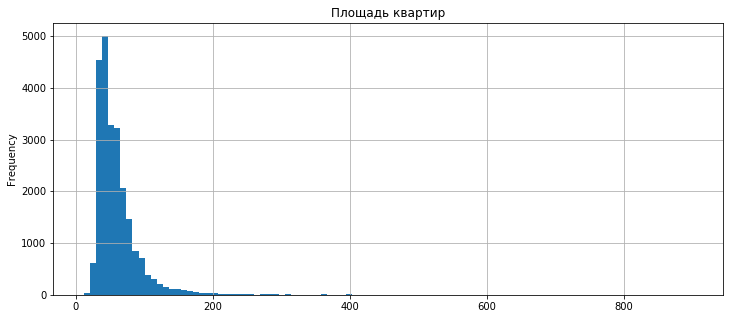

In [101]:
sales_archive['total_area'].plot(
                                kind='hist',
                                bins=100,
                                figsize=(12,5),
                                grid=True, 
                                #range=(0,200),
                                title='Площадь квартир',
                                )

Не очень наглядно, есть явно выбивающиеся значения.
посмотрим на медиану, среднее и квантили данных.

In [102]:
sales_archive['total_area'].median()

52.0

In [103]:
sales_archive['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

медиана похожа на среднее, но у нас есть явно завышенные значения после 200 метров.
можно сказать, что больше всего квартир площадью от 40 до 70. 

построим диаграмму расмаха с помощью boxplot, чтобы ещё раз изучить результаты.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32f579290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32f5028d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32f4ff210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32f502f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32f50b850>],
 'means': []}

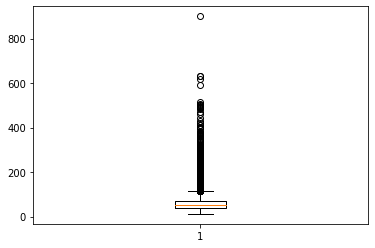

In [104]:
plt.boxplot(sales_archive['total_area'])

на граыифке видно, что выбросов ещё слишком много, сузим рамки

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32f4ea750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32f4f5e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32f4ea710>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32f47d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32f47ddd0>],
 'means': []}

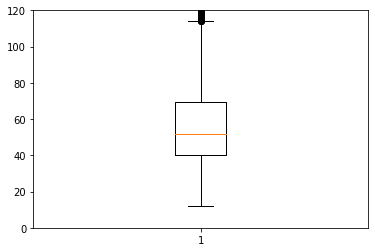

In [105]:
plt.ylim(0,120)
plt.boxplot(sales_archive['total_area'])

Теперь становиться очевидно, что значения пригодные для дальнейшего анализа находятся от 
15 до 115 метров.
В дальнейшем мы исключим выбиваюищеся значения из выборки.

### Исследование параметра цена.

Аналогично построим гистограмму для параметра цена.

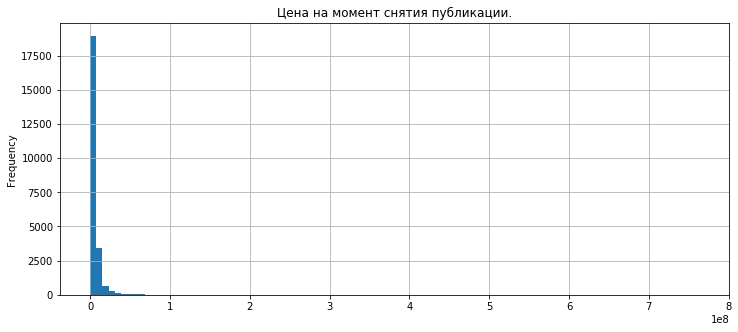

In [106]:
sales_archive['last_price'].plot(
                                kind='hist',
                                bins=100,
                                figsize=(12,5),
                                grid=True, 
                                #range=(0,1000000),
                                title='Цена на момент снятия публикации.',
                                )

в таком масштабе совершенно график выглядит совершенно не наглядно.


Попробуем построить ящик с усами с помощью **boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32ebafe90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32eb56f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32ebaf490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32eb5d990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32eb5de90>],
 'means': []}

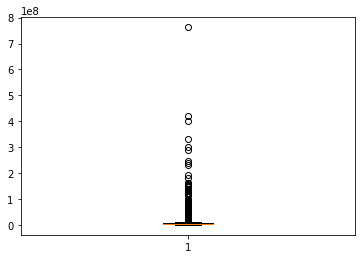

In [107]:
plt.boxplot(sales_archive['last_price'])

совсем ничего не понятно, сузим рамки.
Рассмотрим квантили.

In [108]:
sales_archive['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

при таких больших цифрах в столбце тяжело рассмотреть зависимость.
Попробуем разделить все цены на 1 млн, чтобы было проще оперировать  с меньшими цифрами.
Будем держать в уме, что мы говорим о миллионах, а не единицах и десятках в дальнейшем.

In [109]:
sales_archive['last_price'] = sales_archive['last_price'] / 1000000

In [110]:
sales_archive['last_price'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

с такими данными работать намного проще. 
Попробуем построить графики ограничив диапозон **range**.

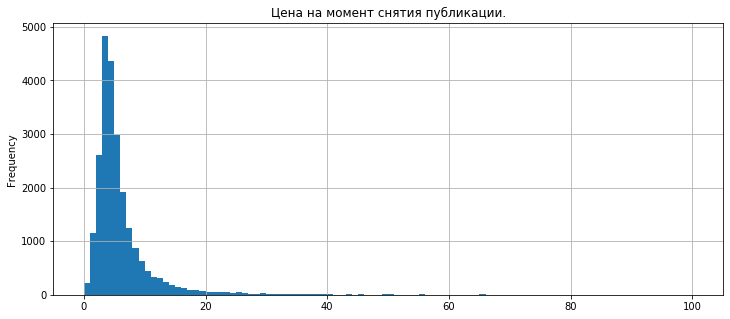

In [111]:
sales_archive['last_price'].plot(
                                kind='hist',
                                bins=100,
                                figsize=(12,5),
                                grid=True, 
                                range=(0,100),
                                title='Цена на момент снятия публикации.',
                                )

Теперь видно, что падение количества объявлений начинается с 10 (10 млн как мы помним)

Построим ящик с усами, чтобы провести дополнительный анализ.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32e87cdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32e916b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32e87cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32e885ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32e881a10>],
 'means': []}

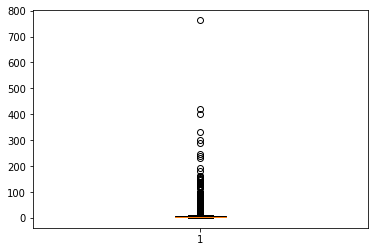

In [112]:
plt.boxplot(sales_archive['last_price'])

сузим границы графика.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32e7f4450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32e7f4e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32e86a810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32e7fc910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32e7fce10>],
 'means': []}

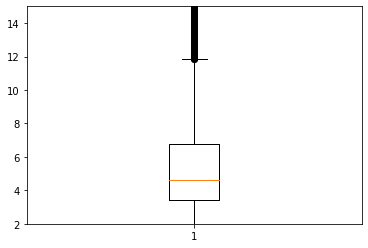

In [113]:
plt.ylim(2,15)
plt.boxplot(sales_archive['last_price'])

Верхняя граница выглядит праводобно, но у нас большое количество значений около нуля.
Посмотрим на них отдельно, что это за объявления.

In [114]:
sales_archive.query('last_price <1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type,ratio_total_living,ratio_total_kitchen
164,6,0.80,40.3,2018-06-25,2,2.725,3,22.897727,1,False,...,-40.300000,-40.300000,19851.116625,0,Понедельник,6,2018,Первый,0.568182,0.172348
247,7,0.65,31.0,2017-01-20,1,2.500,3,17.613636,1,False,...,-31.000000,-31.000000,20967.741935,4,Пятница,1,2017,Первый,0.568182,0.172348
259,6,0.90,30.0,2017-11-21,1,2.500,5,15.000000,4,False,...,2.000000,6.000000,30000.000000,1,Вторник,11,2017,Другой,0.500000,0.166667
268,7,0.65,46.0,2018-03-15,2,2.500,5,30.000000,5,False,...,1.533333,6.571429,14130.434783,3,Четверг,3,2018,Последний,0.652174,0.152174
293,2,0.90,42.8,2017-06-14,2,2.675,5,32.000000,5,False,...,1.337500,8.560000,21028.037383,2,Среда,6,2017,Последний,0.747664,0.116822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,8,0.60,31.8,2019-04-24,1,2.500,2,20.000000,1,False,...,1.590000,4.542857,18867.924528,2,Среда,4,2019,Первый,0.628931,0.220126
23153,9,0.65,41.0,2017-10-13,2,2.700,3,28.000000,1,False,...,1.464286,6.833333,15853.658537,4,Пятница,10,2017,Первый,0.682927,0.146341
23354,18,0.90,42.6,2018-02-26,2,2.600,2,28.000000,1,False,...,1.521429,4.733333,21126.760563,0,Понедельник,2,2018,Первый,0.657277,0.211268
23484,11,0.47,44.5,2018-07-02,2,2.505,2,28.000000,2,False,...,1.589286,5.933333,10561.797753,0,Понедельник,7,2018,Последний,0.629213,0.168539


Таких значений не много, посмотрим в каких населённых пунктах они нахоядятся.

In [115]:
sales_archive.query('last_price <1')['locality_name']

164      поселок городского типа Ефимовский
247                                  Сланцы
259                               Ивангород
268                                  Сланцы
293                               Сясьстрой
                        ...                
23067                       деревня Коркино
23153                          Бокситогорск
23354                     деревня Тихковицы
23484                                Сланцы
23643                                Сланцы
Name: locality_name, Length: 225, dtype: object

Все объявления о продаже в маленьких населённых пунктах, думаю это изначально дешёвое жилье, а не выброс.
Если брать во внимание квантили, то думаю уместно ограничить выборку в диапозоне **от 2 до 12 млн.**

### Исслеования параметра число комнат

Исследуем параметр число комнат.
Построим график с помощью **plot** с параметром **kind='hist'**

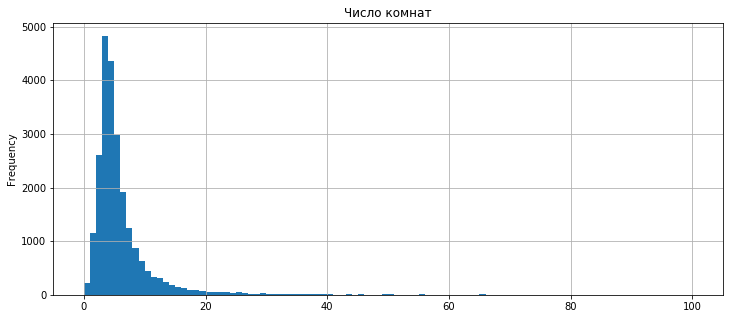

In [116]:
sales_archive['last_price'].plot(
                                kind='hist',
                                bins=100,
                                figsize=(12,5),
                                grid=True, 
                                range=(0,100),
                                title='Число комнат',
                                )

видно, что у нас очень много выбросов. 
**И график идёт на спад после 5-7 комнат.** 
Построим диагрмму размаха **boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32e5f3f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32e5f99d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32e5f3390>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32e5f1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32e600950>],
 'means': []}

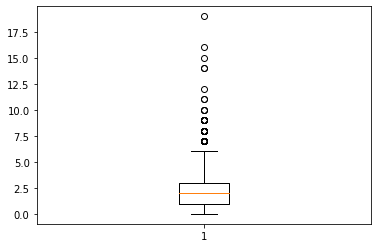

In [117]:
plt.boxplot(sales_archive['rooms'])

Выбросы начинаются после 6 комнат.

Посмотрим медиану и квантили.

In [118]:
sales_archive['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Смущают значения с 0 количеством комнат.
Возможно это квартиры  открытой планировкой ?
проверим

In [119]:
print('Количество объёявлений', sales_archive.query('rooms<1')['open_plan'].count())
print('Процент пропусков от всех значений столбца: {:2.1%}'.format(len(sales_archive.query('rooms <1')) 
     / sales_archive.shape[0]))

sales_archive.query('rooms<1')['open_plan']

Количество объёявлений 194
Процент пропусков от всех значений столбца: 0.8%


144      False
349       True
440      False
508       True
608      False
         ...  
23210    False
23442     True
23554    False
23592     True
23637    False
Name: open_plan, Length: 194, dtype: bool

теория не подтвердилась, нулевое количество комнат не обязательно = открытой планировке.
Возможно тогда это квартиры студии ?  
Но согласно открытым источникам их количество на рынке 4-7% от общего числа объявлений, что опять не соотвествует теории.
[ссылка](https://rg.ru/2019/10/29/spros-na-malometrazhnoe-zhile-v-rossii-uverenno-rastet.html)

Построим диаграмму размаха и зададим ограничения.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32e61ec90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32e5ebb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32e61eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32e573610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32e573b10>],
 'means': []}

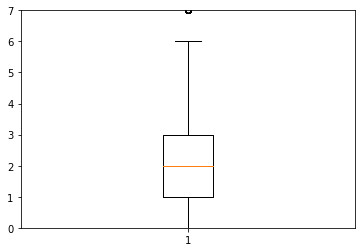

In [120]:
plt.ylim(0,7)
plt.boxplot(sales_archive['rooms'])

Согласасно нашим исследования оптимальное количество   комнат в выборке от **1 до 6** 

*ps нулевые значения мы игнорируем так как они составляют меньше процента от общей выборки

### Исследование высоты потолков.

Исследуем параметр высота.
Построим график с помощью **plot** с параметром **kind='hist'**

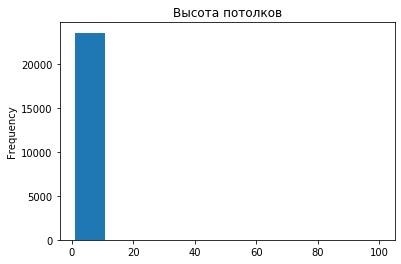

In [121]:
sales_archive['ceiling_height'].plot(kind='hist',
                                    bins=10,
                                    title='Высота потолков')

посмотрим медиану, среднее и квантили.

In [122]:
sales_archive['ceiling_height'].describe()

count    23565.000000
mean         2.727210
std          1.030947
min          1.000000
25%          2.550000
50%          2.600000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

выброс в 100м явно нужно убирать.   
Дополнительно рассмотрим ящик с усами.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32c45b990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32c44fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32c44fd50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32c462ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32c45ba10>],
 'means': []}

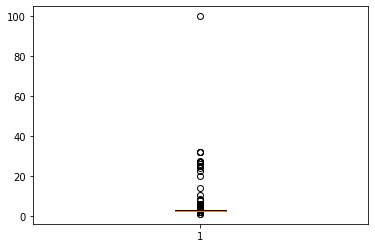

In [123]:
plt.boxplot(sales_archive['ceiling_height'])

один огромный выброс на 100 и много в районе 20.
Всё это надо отсекать.

Поставим границы **range** в методе **plot**

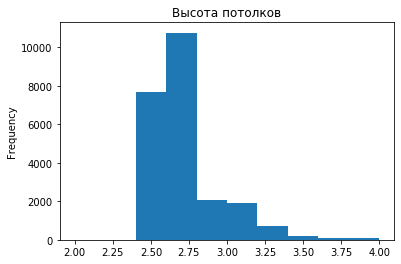

In [124]:
sales_archive['ceiling_height'].plot(kind='hist',
                                    bins=10,
                                    range=(2,4),
                                    title='Высота потолков')

больше всего значений в районе 2.3 до 2.8 м далее идёт спад.

построим диаграмму размаха с аналогичными рамками.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb32c2d6710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb32c2d6d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb32c425e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb32c2ddbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb32c2ddd10>],
 'means': []}

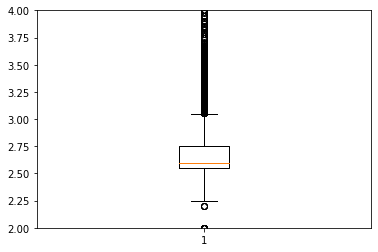

In [125]:
plt.ylim(2,4)
plt.boxplot(sales_archive['ceiling_height'])

на графике чётко видны границы усов ограничем наши дальнейшие исследования диапозоном **2.1 и 3**

In [126]:
dict_inv1 = ['total_area','last_price','rooms','ceiling_height'] #inv скоращенно от investogation исследование

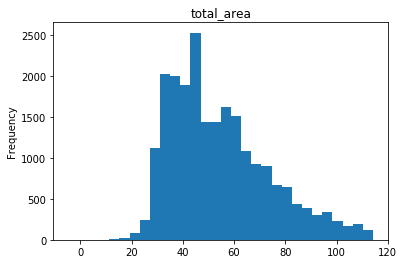

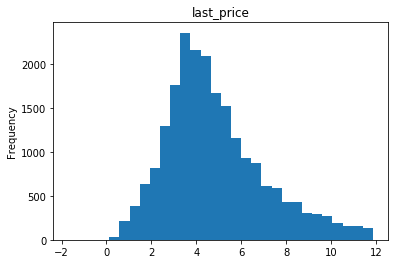

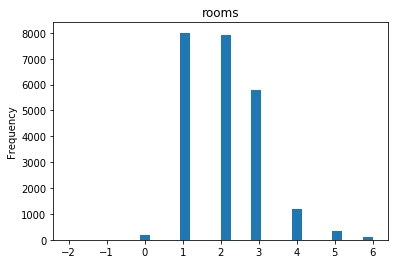

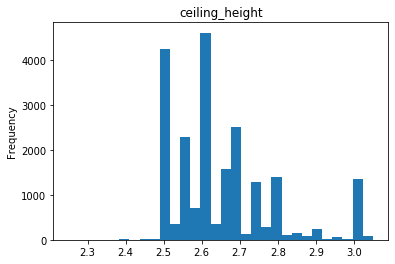

In [127]:
for source in dict_inv1:
    Q1 = sales_archive[source].quantile(0.25)
    Q3 = sales_archive[source].quantile(0.75)
    IQR = Q3 - Q1
    range1 = Q1 - 1.5 * IQR
    range2 = Q3 + 1.5 * IQR
    sales_archive[source].plot(kind='hist',
                                    bins=30,
                                    range=(range1,range2),
                                    title=source)
    plt.show(source)

### Исследование времени продажи квартир.

Исследуем время продажи квартир, построим график с помощью **plot**

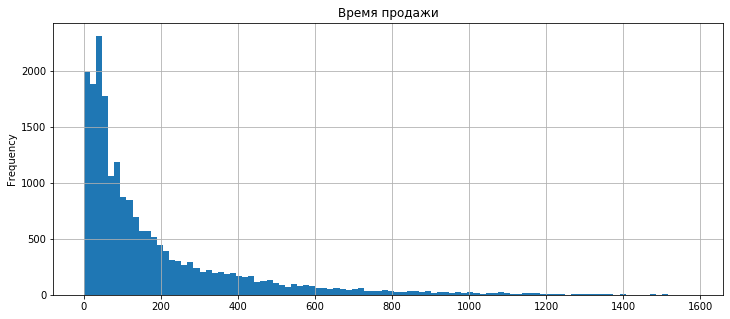

In [128]:
sales_archive.query('days_exposition > 0')['days_exposition'].plot(
                                kind='hist',
                                bins=100,
                                figsize=(12,5),
                                grid=True, 
                                #range=(0,200),
                                title='Время продажи',
                                )


Найдём среднее, медиану и квантили.

In [129]:
sales_archive.query('days_exposition > 0')['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

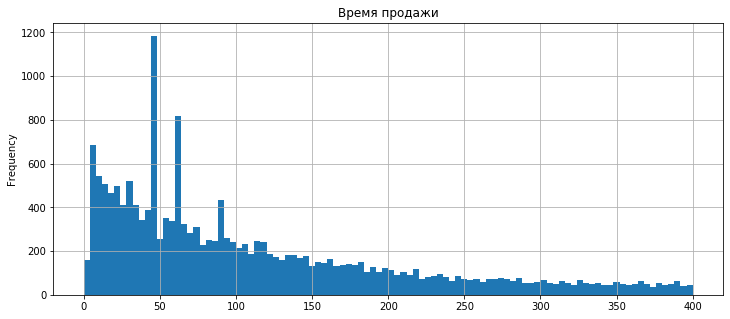

In [130]:
sales_archive['days_exposition'].plot(
                                kind='hist',
                                bins=100,
                                figsize=(12,5),
                                grid=True, 
                                range=(0,400),
                                title='Время продажи',
                                )

In [131]:
sales_archive.query('10<days_exposition <400')['days_exposition'].describe()

count    16515.000000
mean       119.003391
std         96.917766
min         11.000000
25%         45.000000
50%         87.000000
75%        171.000000
max        399.000000
Name: days_exposition, dtype: float64

Исходя из наших данных можем сказать что:
* необычайно быстро это менее 40 дней
* очень долго более 150

### Уберите редкие и выбивающиеся значения

Сделаем срез данных, который уберёт выбросы из данных обнаруженные при исследовании параметров от которых зависят наши данные.

In [132]:
good_sales_archive = sales_archive.query('15 <= total_area <=115 and 0<= rooms <=6 and 2<=ceiling_height<=3 and 2<= last_price<=12 and 10<days_exposition <400 and 0 < cityCenters_nearest and 0 < days_exposition').copy()

Много выбросов, которые явно являются ошибками при вводе. Например потолки в 100 метров или же наоборот слишком маленькие квартиры.
Также много пропусков, которые я связываю с ошибками заполнения и сбора данных.
Например отсутствие данных о ближайших прудах и парках, плозщаль кухонь и жилая площадь.

### Какие факторы больше всего влияют на стоимость квартиры?

Изучите, 
* зависит ли цена от квадратного метра 
* числа комнат 
* удалённости от центра
* Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
* Также изучите зависимость от даты размещения: дня недели, месяца и года.

### Зависимость ~~цены~~ цены за квадртаный метр  от площади 

Построим диаграмму для изучения зависимости цены от площади.

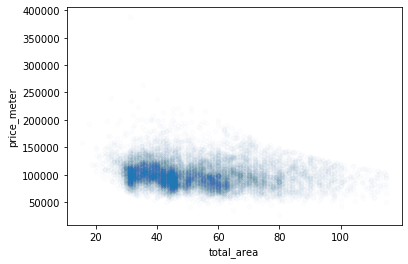

In [133]:
good_sales_archive.plot(x='total_area', y='price_meter', kind='scatter', alpha=0.01)

In [134]:
print(good_sales_archive['total_area'].corr(good_sales_archive['price_meter']))

-0.16247097263617044


 отрицательная корреляция, увеличения общей площади не увеличивает цену за квадртаный метр.

### Зависимость цены от этажа.

Используем сводную таблицу **pivot_table** для изучения зависимости цены от этажа.

In [135]:
floor_hist =   good_sales_archive.pivot_table(index='floor_type', values='price_meter', aggfunc=['mean','median'])

Переименуем столбцы новой таблицы для удобства и отсортируем значения.

In [136]:
floor_hist.columns = ['mean','median']
floor_hist.sort_values(by='mean')

,mean,median
floor_type,,
Первый,90940.703234,87831.010453
Последний,97498.665736,94023.904382
Другой,103016.221764,100000.000000


Зависимость уже очевидна, но построим график для наглядности.

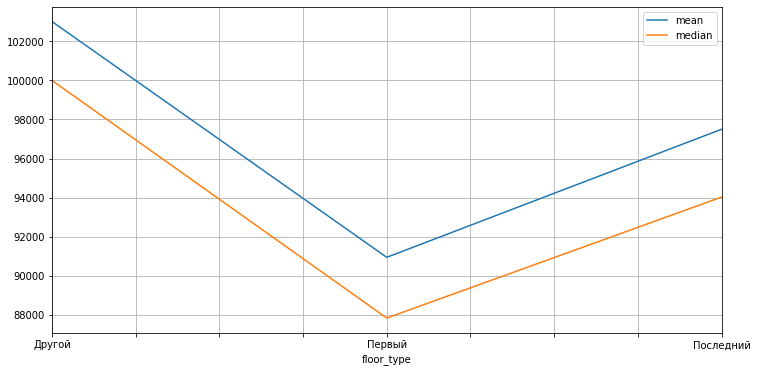

In [137]:
floor_hist.plot(grid=True, figsize=(12, 6))


По визуализации данных и по свобдной таблице можно сделать вывод, что:
квартиры на 1 этаже самые дешёвые
на последнем чуть дороже
на всех остальных этажах ценять больше, чем остальные

### Зависимость цены от количества комнат 

построим сводную таблицу **pivot_table** для изучения зависимости.

In [138]:
rooms_hist =   good_sales_archive.pivot_table(index='rooms', values='price_meter', aggfunc=['mean','median'])

Построим график

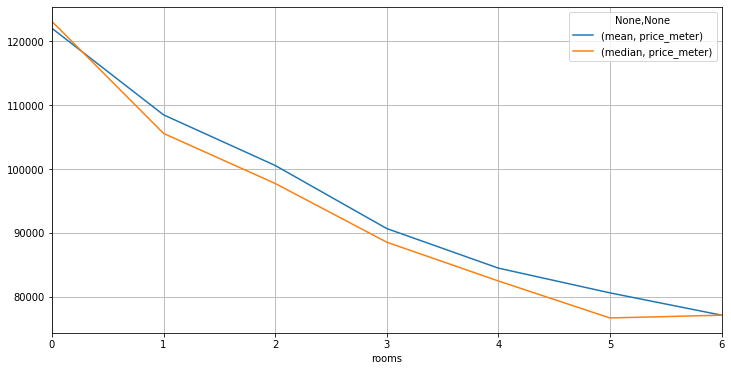

In [139]:
rooms_hist.plot(grid=True, figsize=(12, 6))


In [140]:
print(good_sales_archive['rooms'].corr(good_sales_archive['last_price']))

0.4899384665977084


Зависимость очевидна, чем больше комнат, тем дешевле квадртный метр. Это также подверждает наше предыдущее исследования о площади.

### Изучение цены в зависимости от дня недели

Построим сводную таблицу для изучения этого параметра.

In [141]:
weekday_hist =   good_sales_archive.pivot_table(index='weekday', values='price_meter', aggfunc=['mean','median'])

Построим график.

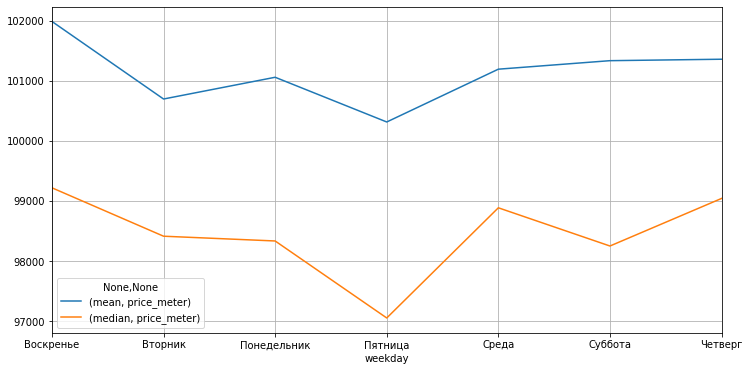

In [142]:
weekday_hist.plot(grid=True, figsize=(12, 6))


Линия почти прямая, кроме пятницы.
В пятницу лучше не продавать недвижимость!

### Изучения зависимости цены от месяца

Построим сводную таблицу **pivot_table** для изучения зависимости.

In [143]:
month_hist =   good_sales_archive.pivot_table(index='month', values='price_meter', aggfunc=['mean','median'])

Построим график.

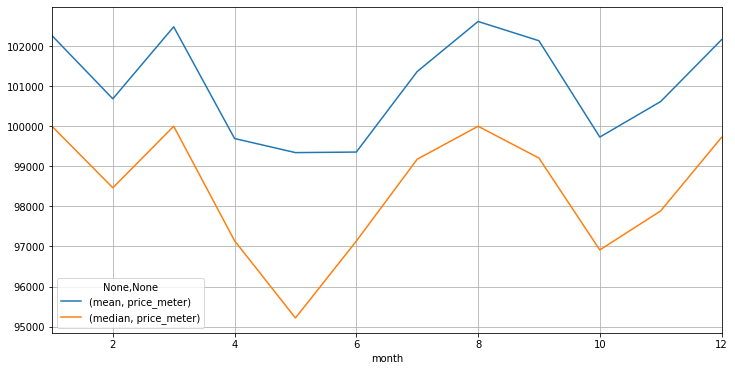

In [144]:
month_hist.plot(grid=True, figsize=(12, 6))


Зависимость очевидна, лучшее время для продажи середина лета. 
Далее осенью цена падает и снова растёт к новому году.

### Изучения зависимости цены от года

Построим сводную таблицу **pivot_table** для изучения зависимости.

In [145]:
year_hist = good_sales_archive.pivot_table(index='year', values='price_meter', aggfunc=['mean','median'])

Построим график.

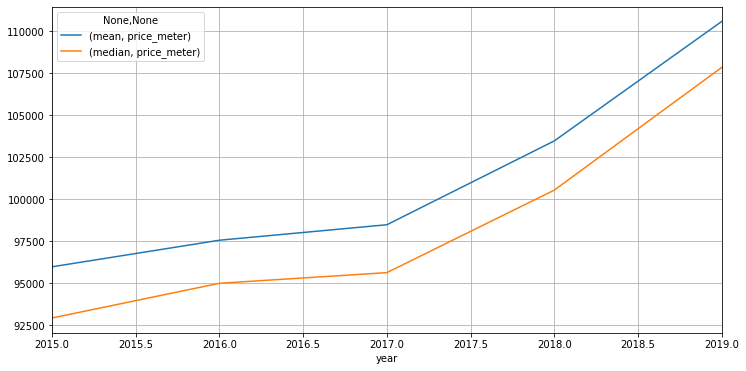

In [146]:
year_hist.plot(grid=True, figsize=(12, 6))


Цена квадртаного метра постепенно увеличвается

### Изучения зависимости ~~цены~~  цены квадртаного метра от удалённости от центра

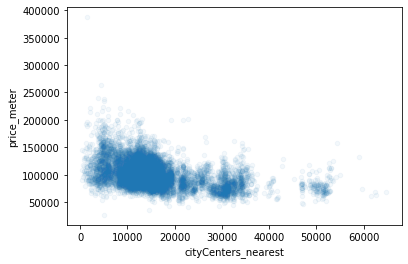

In [147]:
good_sales_archive.plot(x='cityCenters_nearest', y='price_meter', kind='scatter', alpha=0.05)

In [148]:
print(good_sales_archive['cityCenters_nearest'].corr(good_sales_archive['price_meter']))

-0.40142080975104033


 К центру города цены выше.

In [149]:
correlation = good_sales_archive.loc[:,['price_meter', 'year','month', 'weekday' ,'rooms','floor_type','total_area','cityCenters_nearest']]

In [150]:
correlation=correlation.corr()

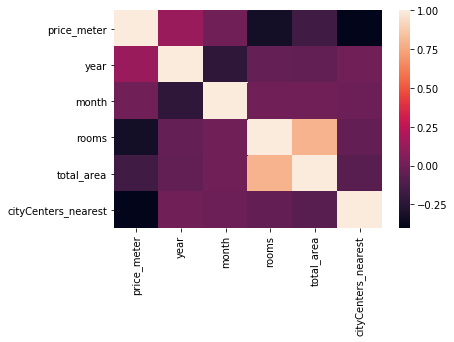

In [151]:
sns.heatmap(correlation)

### Выберите 10 населённых пунктов с наибольшим числом объявлений.

Найдём 10 населённых пунктов с наибольшим количество населённых пунктов.  
Построим сводную таблицу с помощью **pivot_table**

In [152]:
top10_city = good_sales_archive.pivot_table(index='locality_name', values='price_meter', aggfunc='count')

Посмотрим на получившиеся данные

In [153]:
display(top10_city)

,price_meter
locality_name,
Зеленогорск,19
Колпино,248
Красное Село,122
Кронштадт,70
Ломоносов,75
Павловск,23
Петергоф,142
Пушкин,224
Санкт-Петербург,9258


Всё отлично, теперь остортируем таблицу таблицу по убыванию значений, для того чтобы выявить топ 10 городов.

In [154]:
top10_city = top10_city.sort_values(by='price_meter', ascending=False).head(10)

Посмотрим какие города у нас в десятке.

In [155]:
display(top10_city)

,price_meter
locality_name,
Санкт-Петербург,9258
посёлок Шушары,339
Колпино,248
посёлок Парголово,245
Пушкин,224
Петергоф,142
Красное Село,122
Сестрорецк,113
Ломоносов,75


отсортируем данне чтобы найти населённые пункты с самой высокой и низкой стоимостью жилья

In [156]:
top10_data = good_sales_archive.query('locality_name in @top10_city.index')

In [157]:
display(top10_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type,ratio_total_living,ratio_total_kitchen
1,7,3.35,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,2.172043,3.672727,82920.792079,1,Вторник,12,2018,Первый,0.460396,0.272277
6,6,3.70,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,3.518868,2.590278,99195.710456,3,Четверг,11,2017,Другой,0.284182,0.386059
9,18,5.40,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,1.399083,9.384615,88524.590164,6,Воскренье,2,2017,Другой,0.714754,0.106557
10,5,5.05,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,1.950739,4.658824,127525.252525,3,Четверг,11,2017,Другой,0.512626,0.214646
13,20,3.55,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,1.585185,8.230769,82943.925234,5,Суббота,7,2017,Последний,0.630841,0.121495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,8,3.30,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,1.722222,4.769231,106451.612903,5,Суббота,4,2017,Другой,0.580645,0.209677
23687,6,3.20,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,1.950000,3.545455,82051.282051,5,Суббота,12,2017,Другой,0.512821,0.282051
23689,13,3.55,35.3,2018-02-28,1,2.86,15,16.3,4,False,...,2.165644,3.879121,100566.572238,2,Среда,2,2018,Другой,0.461756,0.257790
23690,3,5.50,52.0,2018-07-19,2,2.60,5,31.0,2,False,...,1.677419,8.666667,105769.230769,3,Четверг,7,2018,Другой,0.596154,0.115385


с помощью сводной таблицы **pivot_table** найдём среднее значение цены за квадртаный метр  для нашей десятки

In [158]:
top10_data_mean =top10_data.pivot_table(index='locality_name', values='price_meter', aggfunc=['mean'])

переименуем столбец для удобства

In [159]:
top10_data_mean.columns=['mean']

Найдём город с самой высокой стоимостью квадртаного метра

In [160]:
top10_data_mean.sort_values(by='mean', ascending=False).head(1)

,mean
locality_name,
Санкт-Петербург,104307.83584


ожидаемо это Санкт Петербург

In [161]:
top10_data_mean.sort_values(by='mean', ascending=False).tail(1)

,mean
locality_name,
Красное Село,71960.707437


А последним в десятке оказался Всеволожск

### Найти квартиры в центре 

Сделаем новый срез данных из таблицы с отобранными по нашим предыдущим исследованиям.

In [162]:
spb_sales_archive = good_sales_archive.query('locality_name == "Санкт-Петербург"').copy()

Посмотрим на полуившуюся таблицу.

In [163]:
display(spb_sales_archive)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coefficient_living_of_total,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type,ratio_total_living,ratio_total_kitchen
9,18,5.40,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,1.399083,9.384615,88524.590164,6,Воскренье,2,2017,Другой,0.714754,0.106557
10,5,5.05,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,1.950739,4.658824,127525.252525,3,Четверг,11,2017,Другой,0.512626,0.214646
15,16,4.65,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,1.902439,5.131579,119230.769231,5,Суббота,11,2017,Другой,0.525641,0.194872
18,8,3.25,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,1.597938,5.535714,104838.709677,4,Пятница,1,2017,Другой,0.625806,0.180645
21,13,3.20,31.6,2018-03-14,1,2.50,5,16.9,2,False,...,1.869822,5.543860,101265.822785,2,Среда,3,2018,Другой,0.534810,0.180380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,13,5.25,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,1.482759,7.166667,122093.023256,4,Пятница,5,2018,Другой,0.674419,0.139535
23686,8,3.30,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,1.722222,4.769231,106451.612903,5,Суббота,4,2017,Другой,0.580645,0.209677
23687,6,3.20,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,1.950000,3.545455,82051.282051,5,Суббота,12,2017,Другой,0.512821,0.282051
23689,13,3.55,35.3,2018-02-28,1,2.86,15,16.3,4,False,...,2.165644,3.879121,100566.572238,2,Среда,2,2018,Другой,0.461756,0.257790


Добавим новый столец с округлённым значением расстояния до центра в километрах.

In [164]:
spb_sales_archive['km_center'] = spb_sales_archive['cityCenters_nearest'] / 1000

In [165]:
spb_sales_archive['km_center'] = spb_sales_archive['km_center'].astype('int64')

Проверим корректность добавления.

In [166]:
display(spb_sales_archive)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coefficient_kitchen_of_total,price_meter,weekday_index,weekday,month,year,floor_type,ratio_total_living,ratio_total_kitchen,km_center
9,18,5.40,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,9.384615,88524.590164,6,Воскренье,2,2017,Другой,0.714754,0.106557,15
10,5,5.05,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,4.658824,127525.252525,3,Четверг,11,2017,Другой,0.512626,0.214646,13
15,16,4.65,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,5.131579,119230.769231,5,Суббота,11,2017,Другой,0.525641,0.194872,14
18,8,3.25,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,5.535714,104838.709677,4,Пятница,1,2017,Другой,0.625806,0.180645,10
21,13,3.20,31.6,2018-03-14,1,2.50,5,16.9,2,False,...,5.543860,101265.822785,2,Среда,3,2018,Другой,0.534810,0.180380,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,13,5.25,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,7.166667,122093.023256,4,Пятница,5,2018,Другой,0.674419,0.139535,7
23686,8,3.30,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,4.769231,106451.612903,5,Суббота,4,2017,Другой,0.580645,0.209677,11
23687,6,3.20,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,3.545455,82051.282051,5,Суббота,12,2017,Другой,0.512821,0.282051,16
23689,13,3.55,35.3,2018-02-28,1,2.86,15,16.3,4,False,...,3.879121,100566.572238,2,Среда,2,2018,Другой,0.461756,0.257790,16


Столбец добавился корректно. Продолжаем наше исследование.

Построим сводную таблицу со средним значением цены за метр по удалённости от центра в км.

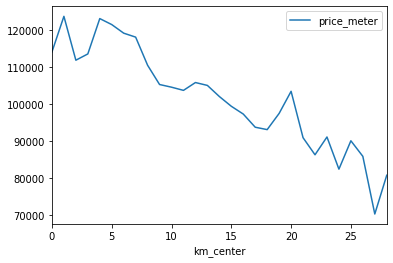

In [167]:
(spb_sales_archive
                .pivot_table(index='km_center', values=['price_meter'], aggfunc='mean')
                .plot()
                 
)

Резкое увеличения цены происходит начиная с удалённости в 7 км, район от 0 до 7 км примем за центр.

### Исследовать квартиры в центре

Сделам новый срез с объявления в центральном районе.

In [168]:
spb_center_sales_archive= spb_sales_archive.query('km_center <=7').copy()

С помощью цикла и списка параметров построим графики исследующие мараметры: общая площадь, количество комнат и высоту потолков.

In [169]:
dict = ['total_area', 'rooms','ceiling_height']

Параметр  total_area для центра


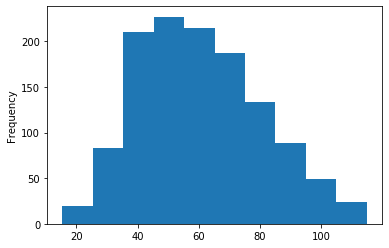

Параметр  total_area для всего города


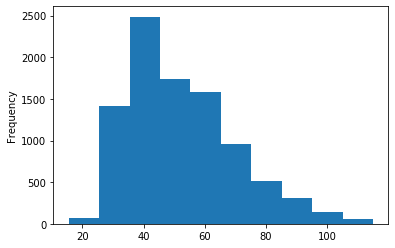

Параметр  rooms для центра


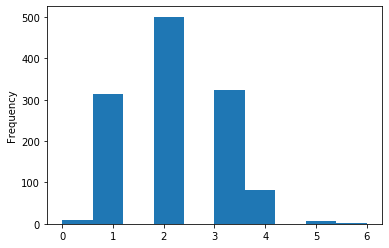

Параметр  rooms для всего города


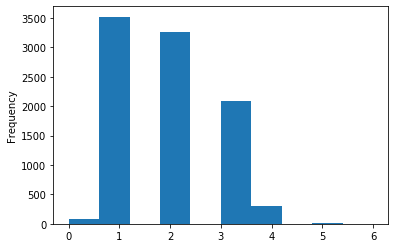

Параметр  ceiling_height для центра


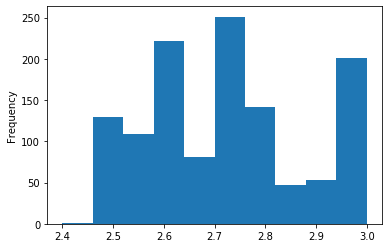

Параметр  ceiling_height для всего города


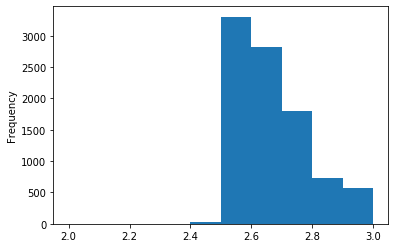

In [170]:
for source in dict:
    print('Параметр ',source,'для центра')
    spb_center_sales_archive[source].plot(kind='hist')
    plt.show(source)
    print('Параметр ',source,'для всего города')
    spb_sales_archive[source].plot(kind='hist')
    plt.show(source)

У центрального и среднего значения по городу можно выделить следующие отличия:
* в центре преобладают квартиры площалью от 40 до 70 метров, когда во всём городе больше всего 40 метровых квартир, а далее количество объёявлений резко падает с увеличением площали.
* в центре количество 2х комнатных квартир заметно выше, чем по городу. Также выше количество 3х комнатных. В среднем по городу же больше 1 комнатных.
* в центре заметно выше высоких потолков, чем в среднем по городу.

Теперь исследуем зависимость цены от параметров: 
* количество комнат
* этаж
* расстояние от центра
* дата начала продажи.

In [171]:
dict2 = ['rooms','floor_type', 'km_center','weekday','month', 'year' ]

Параметр  rooms для центра


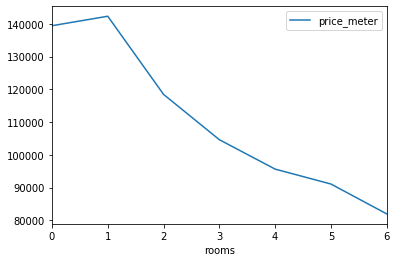

Параметр  rooms для всего города


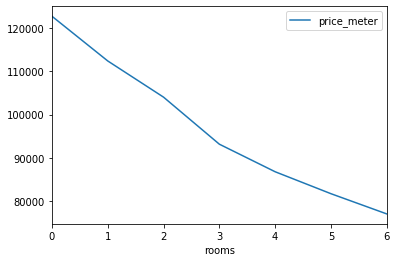

Параметр  floor_type для центра


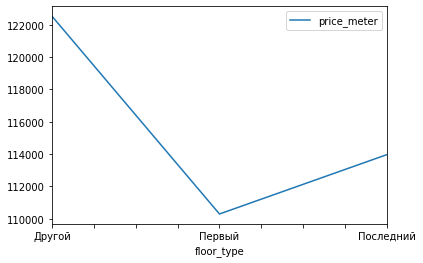

Параметр  floor_type для всего города


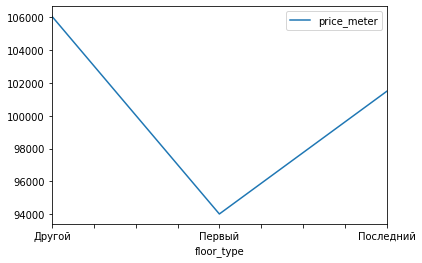

Параметр  km_center для центра


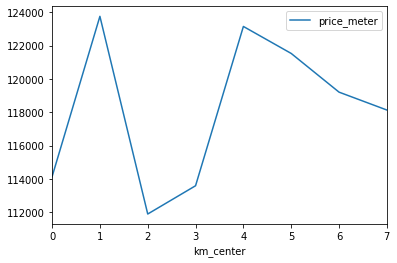

Параметр  km_center для всего города


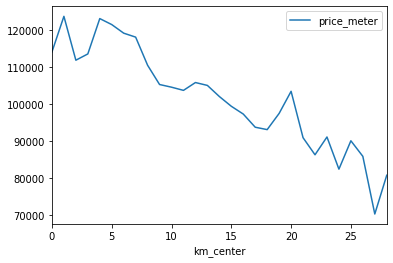

Параметр  weekday для центра


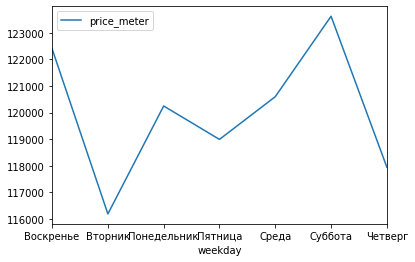

Параметр  weekday для всего города


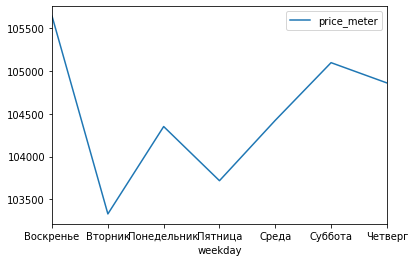

Параметр  month для центра


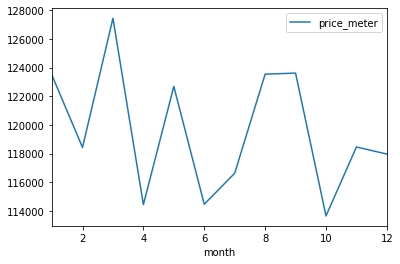

Параметр  month для всего города


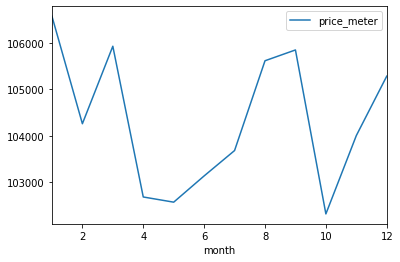

Параметр  year для центра


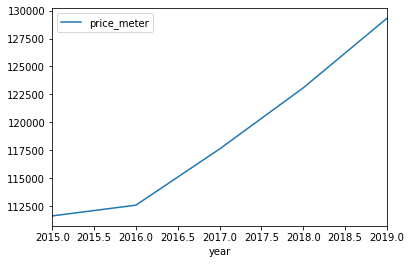

Параметр  year для всего города


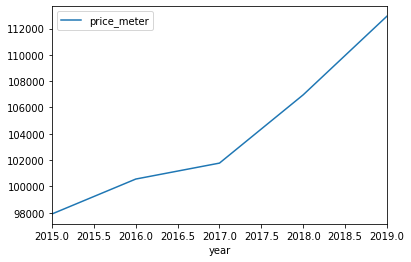

In [172]:
for source in dict2:
    print('Параметр ',source,'для центра')
    (
    spb_center_sales_archive.pivot_table(index=source, values='price_meter', aggfunc='mean')
                            .plot()
        )
    plt.show(source)
    
    print('Параметр ',source,'для всего города')
    (
    spb_sales_archive.pivot_table(index=source, values='price_meter', aggfunc='mean')
                            .plot()
        )
    plt.show(source)

In [173]:
correlation_spb = good_sales_archive.loc[:,['rooms','floor_type', 'km_center','weekday','month', 'year','price_meter' ]]

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [174]:
correlation_spb.corr()

,rooms,km_center,month,year,price_meter
rooms,1.000000,NaN,0.005158,-0.039356,-0.330196
km_center,NaN,NaN,NaN,NaN,NaN
month,0.005158,NaN,1.000000,-0.230843,-0.000422
year,-0.039356,NaN,-0.230843,1.000000,0.138935
price_meter,-0.330196,NaN,-0.000422,0.138935,1.000000


Можем выделить следующие наблюдения:
* в центре как и по всему городу видна зависимость от количества комнат и площади, **больше-дороже**
* по этажам ситуауия тоже идентична
*  цена постепенно растёт 
* по удачным дня тоже есть различия, для центра самый не выгодный вторник, а в для города пятница.
* с месяцами ситуаиця примерно одинакова.

### Шаг 5. Общий вывод

#### Из нашего исследования можно сделать краткие следующие выводы:
* площадь квартиры сильно влияет на её цену, больше дороже.
* этаж квартиры сильно влияет на цену, первый и последний этажи не "любят".
* Цены на квартиры сильно упали из за валютного кризиса 2014 года.
* В летний период недвижимость дешевеет.
* по дня недели тоже есть неудачные дни, но не могу сказать из за чего это происходит, для меня это выглядит нелогично.
* ожидаемо в крупных городах больше объявлений, это подтверждает наш топ10 городов.
* в центре квартиры больше и потолки выше.

#### Итоги по пунктам задания:     
**Изучите, зависит ли цена от квадратного метра?**    
Зависимость сильная.

**Изучите, зависит ли цена от числа комнат?**      
Завимисоть сильная.
  
**Изучите, зависит ли цена от удалённости от центра?**
Зависимость сильная.

**Изучите зависимость цены от того, на каком этаже расположена квартира**    
Первый этаж значительно дешевле, дороже на последним, остальные этаже ценяться намного выше.

**Изучите зависимость от даты размещения: дня недели, месяца и года.**
Летом квартиры дешевле, связываю это со снижением активности на рынке в летний период.    
Квартиры стали дешевле после кризиса в 2014 году и до сих пор цена не вернулась на старый уровень.
По дням недели худшее всего статистика в пятницу, возможно это связано с концом рабочей недели, но для меня это выглядит странно.

**Выберите 10 населённых пунктов с наибольшим числом объявлений.**      
Ожидаемо в крупных городах больше объявлений, чем в мелких населённых пункта, деревнях и посёлках.

**Найдите центр города**     
Центром Спб является зона радиусом 7 км    

**Проанализируйте центр и изучите следующие параметры: площадь, цена, число комнат, высота потолков**
В центре квартиры больше, комнат больше, потолки выше. Планировки квартир лучше, чем в среднем по городу.

**Выделите факторы, которые влияют на стоимость квартиры**
Можно сказать, что в целом результаты совпадают со средними по городу.    

     
**Ход работы**    
Были сделаны следующие шаги по обратке данных:
* первичный осмотр данных
* проверка соответсвия типов данных
* обработка пропусков
* выдвижение гипотез по причинам возникновения пропусков
* добавления новых столбцов необходимых для дальнейшего исследования
* исследование отедльных значимых для дальнейшего исследования параметров 
* нахождение корреляции
* отсеивание выбросов
* исследование центрального района Санкт Петербурга
* иследование зависимостей цен за квадртаный метр от других параметров в центральном районе и в целом по городу 
* общий вывод по проекту
* исправление ошибок и дополнение первоначальных выводов
